# Airbnb Los Angeles Data

## Overview

Airbnb data was gathered from the website(http://insideairbnb.com/get-the-data.html) about its Los Angeles data.  In this notebook we will clean, model, analyze and visualize the data in order to provide insight into the Airbnb Los Angeles activity.

## Purpose

We want to find out what increases or decreases price of the unit, occupancy ratio, and review scores.  We will attempt to answer the following questions.

-  What factors effect price of the unit?
-  Does the price change based on season?
-  What factors effect occupancy ratio of the unit?
-  What factors effect review score of the unit?

In [1]:
# Load modules
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline


## Data Cleaning

We have calendar, listing, review, and neighbourhood data from Airbnb.  Here we will go through each data set to clean, remove null values, and manipulate data to make useful for analysis and modeling.

In [2]:
# pull data

df_calendar = pd.read_csv('calendar.csv')
df_listings = pd.read_csv('listings.csv')
df_reviews = pd.read_csv('reviews.csv')
df_neighbourhoods = pd.read_csv('neighbourhoods.csv')

E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Calendar data cleaning

In [3]:
#Check the data
df_calendar = pd.read_csv('calendar.csv')
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,109,2019-03-07,f,$118.00,$118.00,30.0,730.0
1,67792,2019-03-07,f,$350.00,$350.00,30.0,365.0
2,67792,2019-03-08,f,$350.00,$350.00,30.0,365.0
3,67792,2019-03-09,f,$350.00,$350.00,30.0,365.0
4,67792,2019-03-10,f,$350.00,$350.00,30.0,365.0


### Calendar cleaning step 1

-  Remove '$' from `price` and `adjusted_price`
-  Add a column that converts date to days from the first date
-  Remove any `null` values

In [4]:
# check number of entries
df_calendar.shape

(15766680, 7)

In [5]:
# check for null values
df_calendar.isnull().sum()

listing_id          0
date                0
available           0
price             171
adjusted_price    171
minimum_nights      8
maximum_nights      8
dtype: int64

Because there are a few number of rows with missing data in comparison to the number of rows we will removed the rows with missing data.

In [6]:
#Drop rows with null values
df_calendar_new = df_calendar.dropna()

In [7]:
#Check for null values
df_calendar_new.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [8]:
# remove $ from price and adjusted price
df_calendar_new['price'] = df_calendar_new['price'].str.strip('$').convert_objects(convert_numeric=True)
df_calendar_new['adjusted_price'] = df_calendar_new['adjusted_price'].str.strip('$').convert_objects(convert_numeric=True)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anac

In [9]:
# Check for removed '$'
df_calendar_new.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,109,2019-03-07,f,118.0,118.0,30.0,730.0
1,67792,2019-03-07,f,350.0,350.0,30.0,365.0
2,67792,2019-03-08,f,350.0,350.0,30.0,365.0
3,67792,2019-03-09,f,350.0,350.0,30.0,365.0
4,67792,2019-03-10,f,350.0,350.0,30.0,365.0


In [10]:
#Convert date to days from first date

#Create first date
first_date = datetime.date(2019,3,6)
first_date

#Create empty list to append days
days_list = []

#for each date: find number of days from first date and append to list
for date in df_calendar_new['date']:
    year, month, day = date.split('-')
    year = int(year)
    month = int(month)
    day = int(day)
    cal_date = datetime.date(year,month,day)
    delta_days = cal_date - first_date
    days_list.append(delta_days.days)
    
#Append list to dataframe
df_calendar_new['days'] = days_list

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
#Check for duplicate ID's and different prices for 109
df_calendar_new[df_calendar_new['listing_id']==109].head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,days
0,109,2019-03-07,f,118.0,118.0,30.0,730.0,1
128,109,2019-03-08,f,118.0,118.0,30.0,730.0,2
129,109,2019-03-09,f,118.0,118.0,30.0,730.0,3
130,109,2019-03-10,f,118.0,118.0,30.0,730.0,4
131,109,2019-03-11,f,118.0,118.0,30.0,730.0,5


In [12]:
df_calendar_new['available'].value_counts()

f    8468955
t    7297546
Name: available, dtype: int64

In [130]:
#Find mean 25/50/75 percentiles for each day
daily_mean = []
daily_25 = []
daily_50 = []
daily_75 = []


for day in list(range(365)):
    daily_mean.append(df_calendar_new[df_calendar_new['days']==day]['price'].mean())
    daily_25.append(df_calendar_new[df_calendar_new['days']==day]['price'].describe()['25%'])
    daily_50.append(df_calendar_new[df_calendar_new['days']==day]['price'].describe()['50%'])
    daily_75.append(df_calendar_new[df_calendar_new['days']==day]['price'].describe()['75%'])


# convert lists to dataframe

daily_stats = pd.DataFrame({'Mean':daily_mean,
                          '25th':daily_25,
                          '50th':daily_50,
                          '75th':daily_75})
    
#Check data    
daily_stats.head()

,Mean,25th,50th,75th
0,131.562446,65.0,99.0,150.0
1,140.570696,65.0,99.0,160.0
2,146.716424,68.0,100.0,174.0
3,147.500071,68.0,102.0,175.0
4,142.474715,65.0,100.0,168.0


In [101]:
df_calendar_new.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,days
0,109,2019-03-07,f,118.0,118.0,30.0,730.0,1
1,67792,2019-03-07,f,350.0,350.0,30.0,365.0,1
2,67792,2019-03-08,f,350.0,350.0,30.0,365.0,2
3,67792,2019-03-09,f,350.0,350.0,30.0,365.0,3
4,67792,2019-03-10,f,350.0,350.0,30.0,365.0,4


### Calendar cleaning step 2

We will use the `available` column to get an occupancy to be used in analysis and modeling.

In [13]:
# We will not use this method because it does not create a list to be used later

# Get all id's from listing_id
#list_ids = df_calendar_new['listing_id'][df_calendar_new.duplicated('listing_id')==False]
#list_ids.head()

In [15]:
# Get all id's from listing_id
list_ids=[]

unique_ids = df_calendar_new.duplicated('listing_id')==False
for row in list(range(len(df_calendar_new['listing_id']))):
    try:
        if unique_ids[row] == True:
            list_ids.append(df_calendar_new['listing_id'][row])
    except:
        pass
list_ids[0:5]     

[109, 67792, 23710, 23925, 67837]

In [16]:
# Uncomment to run,  takes a long time to process


# Determine occupancy ratio for each listing_id

occupancy_ratio = []
for unit_id in list_ids:
    ratio = sum(df_calendar_new['available'][df_calendar_new['listing_id']==unit_id]=='f')/df_calendar_new[df_calendar_new['listing_id']==unit_id].shape[0]
    occupancy_ratio.append(ratio)

In [17]:
# Uncomment to save


# Convert to series to save
occupancy_ratio = pd.Series(occupancy_ratio)

#Save for later use
occupancy_ratio.to_csv('occupancy_ratio.csv')

In [18]:
#Load
occupancy_ratio = pd.read_csv('occupancy_ratio.csv',names = ['occupancy_ratio'])

#check data
occupancy_ratio.head()

,occupancy_ratio
0,1.000000
1,0.320548
2,0.660274
3,0.200000
4,0.000000


In [20]:
# create df with corresponding listing_id and occupancy ratio

df_occupancy_ratio = pd.DataFrame({'id':list_ids,
                                   'occupancy_ratio':occupancy_ratio['occupancy_ratio'].tolist()})

df_occupancy_ratio.head()

,id,occupancy_ratio
0,109,1.000000
1,67792,0.320548
2,23710,0.660274
3,23925,0.200000
4,67837,0.000000


## Listing data cleaning

In [21]:
df_listings = pd.read_csv('listings.csv')
df_listings.head()

E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20190306202210,2019-03-07,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,...,f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20190306202210,2019-03-07,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,...,t,f,flexible,f,f,1,1,0,0,0.12
2,2708,https://www.airbnb.com/rooms/2708,20190306202210,2019-03-07,Gold Memory Foam Bed & Breakfast in West Holly...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace display heater. Decorate...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,0.26
3,2732,https://www.airbnb.com/rooms/2732,20190306202210,2019-03-07,Zen Life at the Beach,NaN,This is a three story townhouse with the follo...,This is a three story townhouse with the follo...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,0.19
4,2864,https://www.airbnb.com/rooms/2864,20190306202210,2019-03-06,*Upscale Professional Home with Beautiful Studio*,Centrally located.... Furnished with 42 inch S...,The space is furnished with Thomasville furnit...,Centrally located.... Furnished with 42 inch S...,none,What makes the neighborhood unique is that the...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN


In [22]:
#Check for duplicate id's for 109
sum(df_listings['id'].duplicated())

0

In [23]:
#check number of entries
df_listings.shape

(43196, 106)

In [24]:
# see null values greater than 0
df_listings.isnull().sum()[df_listings.isnull().sum()/df_listings.shape[0]>.75]

thumbnail_url                   43196
medium_url                      43196
xl_picture_url                  43196
host_acceptance_rate            43196
neighbourhood_group_cleansed    43196
square_feet                     42855
weekly_price                    37855
monthly_price                   38294
license                         42415
dtype: int64

##### Listings cleaning plan

-  Remove '$' from columns 'price', 'cleaning_fee', 'extra_people', 'security_deposit'
-  Remove '%' from 'host_response_rate'
-  Remove ', California, United States' from 'host_location'
-  `price` will be used as our `y` variable to predict.
-  Remove all columns with >75% null values. ['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'license']
-  Remove columns that are identifiers of the specific owner. ['listing_url', 'scrape_id', 'name', 'host_id', 'host_name'] (`id` will be used later to merge dataframes)
-  Convert date columns['calendar_last_scraped', 'calendar_updated', 'host_since'] into day columns
-  Remove other columns that may not be useful ['access', 'amenities', 'country', 'country_code', 'description', 'experiences_offered', 'first_review', 'host_about', 'host_url', 'host_verifications', 'house_rules', 'interaction', 'jurisdiction_names', 'last_review', 'last_scraped', 'neighborhood_overview', 'notes', 'picture_url', 'space', 'state', 'street', 'summary', 'transit','host_thumbnail_url', 'host_picture_url']
-  'zipcode' needs to be object


In [25]:
# Remove $ from columns
df_listings['price'] = df_listings['price'].str.strip('$').convert_objects(convert_numeric=True)
df_listings['cleaning_fee'] = df_listings['cleaning_fee'].str.strip('$').convert_objects(convert_numeric=True)
df_listings['extra_people'] = df_listings['extra_people'].str.strip('$').convert_objects(convert_numeric=True)
df_listings['security_deposit'] = df_listings['security_deposit'].str.strip('$').convert_objects(convert_numeric=True)
#Check
df_listings['price'].head()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.
E:\Anaco

0    122.0
1    168.0
2     79.0
3    140.0
4     80.0
Name: price, dtype: float64

In [26]:
# remove % from host_response_rate
df_listings['host_response_rate'] = df_listings['host_response_rate'].str.strip('%').convert_objects(convert_numeric=True)

#check for removal
df_listings['host_response_rate'].head()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


0    100.0
1     67.0
2    100.0
3    100.0
4      NaN
Name: host_response_rate, dtype: float64

In [27]:
# remove , California, United States' from 'host_location from `host_location`
df_listings['host_location'] = df_listings['host_location'].str.strip(', California, United States')

# check for removal
df_listings['host_location'].head()

0      Francisc
1       Burbank
2       Los Ang
3         Monic
4    Long Beach
Name: host_location, dtype: object

In [28]:
#Drop columns with >75% null values
df_listings = df_listings.drop(['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'license'], axis = 1)

In [29]:
#drop identifying columns
df_listings = df_listings.drop(['listing_url', 'scrape_id', 'name', 'host_id', 'host_name'], axis = 1)

In [30]:
# Drop columns that will not be used due to type of data
df_listings = df_listings.drop(['access', 'amenities', 'country', 'country_code', 'description', 'experiences_offered', 'first_review', 'host_about', 'host_url', 'host_verifications', 'house_rules', 'interaction', 'jurisdiction_names', 'last_review', 'last_scraped', 'neighborhood_overview', 'notes', 'picture_url', 'space', 'state', 'street', 'summary', 'transit', 'host_thumbnail_url', 'host_picture_url'], axis = 1)

In [31]:
# Check remaining columns
set(df_listings.columns)

{'accommodates',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'cleaning_fee',
 'extra_people',
 'guests_included',
 'has_availability',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_location',
 'host_neighbourhood',
 'host_response_rate',
 'host_response_time',
 'host_since',
 'host_total_listings_count',
 'id',
 'instant_bookable',
 'is_business_travel_ready',
 'is_location_exact',
 'latitude',
 'longitude',
 'market',
 'maximum_maximum_nights',
 'maximum_minimum_nights',
 'maximum_nights',
 'maximum_nights_avg_ntm',
 'minimum_maximum_nights',
 'minimum_minimum_nights',
 'minimum_nights'

In [32]:
# Check null counts
df_listings.isnull().sum()[df_listings.isnull().sum()>0]

host_since                         4
host_location                    161
host_response_time              8236
host_response_rate              8236
host_is_superhost                  4
host_neighbourhood              8087
host_listings_count                4
host_total_listings_count          4
host_has_profile_pic               4
host_identity_verified             4
neighbourhood                   2012
city                              10
zipcode                          508
market                            71
bathrooms                         30
bedrooms                          21
beds                              37
price                            894
security_deposit               14257
cleaning_fee                    6151
review_scores_rating            8743
review_scores_accuracy          8763
review_scores_cleanliness       8761
review_scores_checkin           8792
review_scores_communication     8769
review_scores_location          8797
review_scores_value             8805
r

##### Listing data cleaning step 2

-  We will remove rows with any missing review score data.  I believe review scores will directly effect the price or be affected by the price.  
-  Change `host_since` from date to days

In [33]:
# remove all rows with any missing data related to review scores
df_listings = df_listings.dropna(subset = ['review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_rating', 'review_scores_value',] , how = 'any')

In [34]:
#check null counts
df_listings.isnull().sum()[df_listings.isnull().sum()>0]

host_since                      2
host_location                  99
host_response_time           4527
host_response_rate           4527
host_is_superhost               2
host_neighbourhood           5821
host_listings_count             2
host_total_listings_count       2
host_has_profile_pic            2
host_identity_verified          2
neighbourhood                1487
city                            8
zipcode                       312
market                         48
bathrooms                      14
bedrooms                       13
beds                           15
price                         399
security_deposit             9413
cleaning_fee                 3021
reviews_per_month               4
dtype: int64

##### Listing imputing data

Filling null data with be done using mean and mode for most of the columns as follows. 

-  Mean: 'security_deposit', 'cleaning_fee'
-  Mode: 'host_since', 'host_location', 'host_is_superhost', 'host_thumbnail_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'city', 'zipcode', 'market', 'host_reponse_time', 'host_reponse_rate', 'bathrooms', 'beds', 'reviews_per_month'
-  We will remove null values missing `price` as it is our prediction value.


In [35]:
#drop rows for missing price
df_listings = df_listings.dropna(subset = ['price'] , how = 'any')

# check for missing price
df_listings['price'].isnull().sum()

0

In [36]:
# Fill nulls with mean
df_listings['security_deposit'] = df_listings['security_deposit'].fillna(df_listings['security_deposit'].mean())
df_listings['cleaning_fee'] = df_listings['cleaning_fee'].fillna(df_listings['cleaning_fee'].mean())

In [37]:
# fill nulls with mode
cols_to_fill = ['host_since', 'host_location', 'host_is_superhost', 'host_neighbourhood', 
                'host_listings_count', 'host_total_listings_count',
                'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'city',
                'zipcode', 'market', 'host_response_time', 'host_response_rate', 'bathrooms',
                'beds', 'reviews_per_month','bedrooms']
for col in cols_to_fill:
    df_listings[col] = df_listings[col].fillna(df_listings[col].mode()[0])
    
#df_listings['host_since'] = df_listings['host_since'].fillna(df_listings['host_since'].mode())    

In [38]:
# Check for nulls
df_listings.isnull().sum()[df_listings.isnull().sum()>0]

Series([], dtype: int64)

In [39]:
#Create first date
first_date = datetime.date(2008,6,20)
first_date

#Create empty list to append days
days_list = []

#for each date: find number of days from first date and append to list
for date in df_listings['host_since']:
    year, month, day = date.split('-')
    year = int(year)
    month = int(month)
    day = int(day)
    cal_date = datetime.date(year,month,day)
    delta_days = cal_date - first_date
    days_list.append(delta_days.days)
    
#Append list to dataframe
df_listings['host_since_days'] = days_list

In [40]:
#Drop `host_since` and check `host_since_days
df_listings = df_listings.drop('host_since', axis=1)
df_listings['host_since_days'].head()

0      7
1     21
2     88
3     89
5    104
Name: host_since_days, dtype: int64

In [41]:
#Check df_listing data
df_listings.head()

,id,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_days
0,109,Francisc,within a day,100.0,f,Culver City,1.0,1.0,t,t,...,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02,7
1,344,Burbank,within a day,67.0,f,Burbank,1.0,1.0,t,t,...,f,flexible,f,f,1,1,0,0,0.12,21
2,2708,Los Ang,within an hour,100.0,t,Hollywood,2.0,2.0,t,t,...,f,strict_14_with_grace_period,f,f,2,0,2,0,0.26,88
3,2732,Monic,within a few hours,100.0,f,Santa Monica,2.0,2.0,t,f,...,f,strict_14_with_grace_period,f,f,2,1,1,0,0.19,89
5,3021,Los Ang,within a few hours,100.0,f,Laurel Canyon,6.0,6.0,t,t,...,f,strict_14_with_grace_period,f,f,5,1,4,0,0.34,104


###### Review data cleaning

In [42]:
# Read data and check
df_reviews = pd.read_csv('reviews.csv')
df_reviews.head()

,listing_id,date
0,109,2011-08-15
1,109,2016-05-15
2,344,2016-06-14
3,344,2016-12-30
4,344,2018-08-28


In [43]:
# Check number of entries
df_reviews.shape

(1306726, 2)

In [44]:
#check nulls
df_reviews.isnull().sum()

listing_id    0
date          0
dtype: int64

#### Review cleaning plan

-  Use `date` to create a `days` column

In [45]:
#Create first date
first_date = datetime.date(2010,11,2)
first_date

#Create empty list to append days
days_list = []

#for each date: find number of days from first date and append to list
for date in df_reviews['date']:
    year, month, day = date.split('-')
    year = int(year)
    month = int(month)
    day = int(day)
    cal_date = datetime.date(year,month,day)
    delta_days = cal_date - first_date
    days_list.append(delta_days.days)
    
#Append list to dataframe
df_reviews['days'] = days_list

In [46]:
#Check data
df_reviews.head()

,listing_id,date,days
0,109,2011-08-15,286
1,109,2016-05-15,2021
2,344,2016-06-14,2051
3,344,2016-12-30,2250
4,344,2018-08-28,2856


###### Neighbourhoods data cleaning

In [47]:
# Pull data and check layout
df_neighbourhoods = pd.read_csv('neighbourhoods.csv')
df_neighbourhoods.head()

,neighbourhood_group,neighbourhood
0,NaN,Acton
1,NaN,Adams-Normandie
2,NaN,Agoura Hills
3,NaN,Agua Dulce
4,NaN,Alhambra


In [48]:
#Check number of entries
df_neighbourhoods.shape

(272, 2)

In [49]:
#Check for null values
df_neighbourhoods.isnull().sum()

neighbourhood_group    272
neighbourhood            0
dtype: int64

##### Neighbourhoods cleaning plan

-  Drop `neighbourhood_group` column

In [50]:
# Drop null column
df_neighbourhoods = df_neighbourhoods.drop('neighbourhood_group',axis = 1)

In [51]:
# CHeck data
df_neighbourhoods.head()

,neighbourhood
0,Acton
1,Adams-Normandie
2,Agoura Hills
3,Agua Dulce
4,Alhambra


## Final Cleaning

-  Create final dataframe
-  Append occupancy ratio to final dataframe
-  Remove `listing_id` once combined
-  Split into `X` and `y` dataframe and series to use in modeling
-  Split `X` into numeric and object columns
-  Use pd.getdummies() on object columns



In [52]:
# Combine df_occupancy_ratio and df_listings
df_final = pd.merge(df_listings,df_occupancy_ratio,on='id')

df_final.head()

,id,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_days,occupancy_ratio
0,109,Francisc,within a day,100.0,f,Culver City,1.0,1.0,t,t,...,strict_14_with_grace_period,t,f,1,1,0,0,0.02,7,1.000000
1,344,Burbank,within a day,67.0,f,Burbank,1.0,1.0,t,t,...,flexible,f,f,1,1,0,0,0.12,21,0.800000
2,2708,Los Ang,within an hour,100.0,t,Hollywood,2.0,2.0,t,t,...,strict_14_with_grace_period,f,f,2,0,2,0,0.26,88,0.956164
3,2732,Monic,within a few hours,100.0,f,Santa Monica,2.0,2.0,t,f,...,strict_14_with_grace_period,f,f,2,1,1,0,0.19,89,0.000000
4,3021,Los Ang,within a few hours,100.0,f,Laurel Canyon,6.0,6.0,t,t,...,strict_14_with_grace_period,f,f,5,1,4,0,0.34,104,0.021918


In [53]:
#Drop `id` column
df_final = df_final.drop('id',axis = 1)
df_final.head()

,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_days,occupancy_ratio
0,Francisc,within a day,100.0,f,Culver City,1.0,1.0,t,t,Culver City,...,strict_14_with_grace_period,t,f,1,1,0,0,0.02,7,1.000000
1,Burbank,within a day,67.0,f,Burbank,1.0,1.0,t,t,Burbank,...,flexible,f,f,1,1,0,0,0.12,21,0.800000
2,Los Ang,within an hour,100.0,t,Hollywood,2.0,2.0,t,t,Hollywood,...,strict_14_with_grace_period,f,f,2,0,2,0,0.26,88,0.956164
3,Monic,within a few hours,100.0,f,Santa Monica,2.0,2.0,t,f,Santa Monica,...,strict_14_with_grace_period,f,f,2,1,1,0,0.19,89,0.000000
4,Los Ang,within a few hours,100.0,f,Laurel Canyon,6.0,6.0,t,t,Bel Air/Beverly Crest,...,strict_14_with_grace_period,f,f,5,1,4,0,0.34,104,0.021918


# Analysis

Here we will analyze price, occupancy ratio, and review_scores_value to see what we can find out about them.

### Price

In [54]:
# Summary of price data
df_final['price'].describe()

count    33989.000000
mean       140.490629
std        125.321499
min          0.000000
25%         69.000000
50%        100.000000
75%        165.000000
max        999.000000
Name: price, dtype: float64

In [60]:
# Define correlation matrix for analysis
corr = df_final.corr()

(array([16292., 11761.,  3283.,  1187.,   546.,   374.,   207.,   134.,
          101.,   104.]),
 array([  0. ,  99.9, 199.8, 299.7, 399.6, 499.5, 599.4, 699.3, 799.2,
        899.1, 999. ]),
 <a list of 10 Patch objects>)

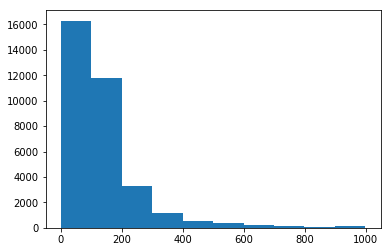

In [61]:
# Price layout
plt.hist(df_final['price'])

In [62]:
# Correlations with price
corr['price'].sort_values(ascending = False)

price                                           1.000000
cleaning_fee                                    0.680646
bedrooms                                        0.642138
accommodates                                    0.619298
bathrooms                                       0.521519
beds                                            0.465990
guests_included                                 0.458659
security_deposit                                0.224758
calculated_host_listings_count_entire_homes     0.198477
extra_people                                    0.198105
review_scores_location                          0.103997
availability_365                                0.097043
host_listings_count                             0.073979
host_total_listings_count                       0.073979
calculated_host_listings_count                  0.066868
availability_30                                 0.063450
review_scores_cleanliness                       0.050309
availability_60                

Text(0.5,1,'Unit Price Over a Year')

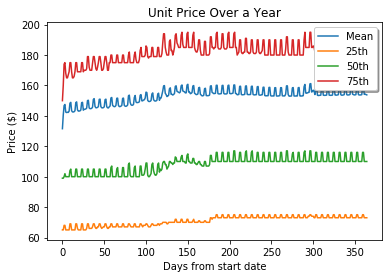

In [168]:
# Plot price over time
fig, ax = plt.subplots()
lines = ax.plot(daily_stats)
ax.legend(('Mean', '25th','50th','75th'), loc='upper right', shadow=True)
ax.set_xlabel('Days from start date')
ax.set_ylabel('Price ($)')
ax.set_title('Unit Price Over a Year')

#### Price impressions

-  The distribution of price is skewed right with the average price per night being $140.  
-  The mean is higher than the median suggesting there is larger variation on the higher end of price.  
-  The top 5 contributors to price were cleaning fee, bedrooms, accommodates, bathrooms, bathrooms, and beds.
-  Price did not vary significantly over time.  Price had a general trend upwards.


### Occupancy Ratio

In [63]:
df_final['occupancy_ratio'].describe()

count    33989.000000
mean         0.532543
std          0.365832
min          0.000000
25%          0.139726
50%          0.578082
75%          0.865753
max          1.000000
Name: occupancy_ratio, dtype: float64

(array([7291., 2684., 1925., 1468.,  990., 3243., 1802., 3430., 3502.,
        7654.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

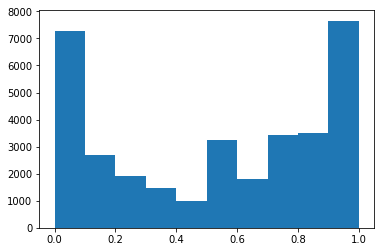

In [64]:
plt.hist(df_final['occupancy_ratio'])

In [65]:
corr['occupancy_ratio'].sort_values(ascending = False)

occupancy_ratio                                 1.000000
host_response_rate                              0.084393
review_scores_value                             0.080208
review_scores_accuracy                          0.070374
review_scores_rating                            0.063588
review_scores_communication                     0.059112
review_scores_checkin                           0.047129
host_since_days                                 0.025807
review_scores_cleanliness                       0.021153
review_scores_location                          0.015208
longitude                                      -0.004223
latitude                                       -0.008146
reviews_per_month                              -0.009384
minimum_maximum_nights                         -0.022186
maximum_nights_avg_ntm                         -0.022208
maximum_maximum_nights                         -0.022259
maximum_nights                                 -0.022264
minimum_minimum_nights         

#### Occupancy ratio impressions

The distribution of the occupancy ratio is bimodal with the peaks closer to 0 and 1 while the average was 53%.  The 25th and 75th percentile are 13.9% and 86.6%.  The biggest contributing factor is booking for multiple days in a row.   After that the next 5 contributors were host listings count, cleaning fee, price, number of reviews, a,d bathrooms.

### Review scores value

In [93]:
# for analysis of review_score_rating, we will removed columns directly contributing to review score
df_review_final = df_final.drop(['review_scores_accuracy', 'review_scores_value','review_scores_cleanliness','review_scores_checkin','review_scores_location','review_scores_communication'], axis = 1)
review_corr = df_review_final.corr()

In [94]:
df_review_final['review_scores_rating'].describe()

count    33989.000000
mean        94.437848
std          8.368003
min         20.000000
25%         93.000000
50%         97.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

(array([1.1000e+02, 8.0000e+00, 5.6000e+01, 3.6000e+01, 1.5000e+01,
        3.4300e+02, 3.8600e+02, 1.4610e+03, 4.7310e+03, 2.6843e+04]),
 array([ 20.,  28.,  36.,  44.,  52.,  60.,  68.,  76.,  84.,  92., 100.]),
 <a list of 10 Patch objects>)

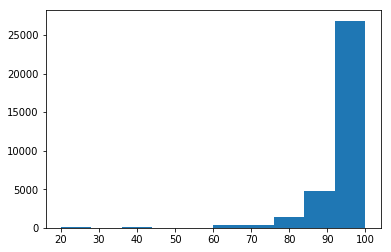

In [95]:
plt.hist(df_review_final['review_scores_rating'])

In [96]:
review_corr['review_scores_rating'].sort_values(ascending = False)

review_scores_rating                            1.000000
number_of_reviews_ltm                           0.081976
host_response_rate                              0.079454
reviews_per_month                               0.071054
number_of_reviews                               0.064604
occupancy_ratio                                 0.063588
security_deposit                                0.054829
price                                           0.048366
cleaning_fee                                    0.034394
latitude                                        0.027209
extra_people                                    0.026532
maximum_minimum_nights                          0.013495
minimum_nights_avg_ntm                          0.013192
minimum_nights                                  0.013096
minimum_minimum_nights                          0.011581
bedrooms                                        0.007897
guests_included                                -0.002964
minimum_maximum_nights         

#### Review scores value impression

The data is very heavily skewed left.  The average score is 94.4.  There were not any factors that strongly contributed to `review_scores_rating`.If we ignore the review scores that directly contribute the the calcuation of the review scores value, the top 5 contributors are related to  host_listings count, booking for multiple days, occupancy ratio, reviews per month, and beds.

In [69]:
corr.style.background_gradient(cmap='coolwarm')

## Modeling

Here we will introduce a few functions to mainpulate model, and evaluate the models.

-  `clean_data`: This function will split the data into `X` and `y` (variables and predictions) sets and use `get_dummies()` to break up each variable.  
-  `find_optimal_lm_mod`: This function will use cutoff values to determine the optimal number of variables for the model and return the model and r2 scores. 
-  `coef_weights`: This function will return the coefficients with the strongest weights in each model.

### Funcitons

In [70]:
#Ref Udacity lesson1 conc:43
def clean_data(df,pred):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Create X as all the columns that are not the prediction column
    2. Create y as the prediction column
    3. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Choose prediction response
    y = df[pred]    
    
    # Drop prediction response
    df = df.drop(pred,axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y

# Ref udacity AllTogether.py  in lessons
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.ylim(0,1)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

# Ref Udacity lesson 1 conc:4
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df



### Price

In [71]:
#Use the function to create X and y
X, y = clean_data(df_final,pred='price')    

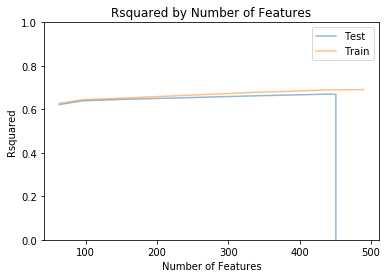

In [72]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [2500,1000, 500, 175, 120,115,110,105,100]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [73]:
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2

0.6699035387347524
0.689025802736221


In [74]:
#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(50)

,est_int,coefs,abs_coefs
261,city_Malibu,2.246079e+13,2.246079e+13
368,"smart_location_Malibu, CA",-2.246079e+13,2.246079e+13
364,"smart_location_Hawthorne, CA",-2.012566e+13,2.012566e+13
257,city_Hawthorne,2.012566e+13,2.012566e+13
381,"smart_location_West Hollywood, CA",1.619647e+13,1.619647e+13
274,city_West Hollywood,-1.619647e+13,1.619647e+13
266,city_Redondo Beach,-1.547759e+13,1.547759e+13
373,"smart_location_Redondo Beach, CA",1.547759e+13,1.547759e+13
376,"smart_location_Santa Monica, CA",-1.023849e+13,1.023849e+13
269,city_Santa Monica,1.023849e+13,1.023849e+13


### Price modeling impressions

-  The strongest predictor of price is location(`city`, `neighborhood`, and `smart location`).
    - Higher price by `city`:  [Malibu, Hawthorne, Santa Monica, Manhattan Beach, Torrance, Culver City, Venice, Alhambra]
    - Lower price by `city`:  [West Hollywood, Redondo Beach, Altadena, Burbank, Topanga, San Gabriel, Hacienda Heights, Monterey Park, Glandale, Temple City, Inglewood]
    - Lower price by `neighbourhood`: Torrance
    - Smart location had an opposite effect of the city it was in.
-  The next most significant predictor was related to host listings count.
    - `host_listings_count`, `calculated_host_listings_count_shared_rooms`, and `calculated_host_listings_count_private_rooms` had a negative impact on price.
    - `host_total_listings_count` and `calculated_host_listings_count`, had a positive impact on price


### Occupancy ratio

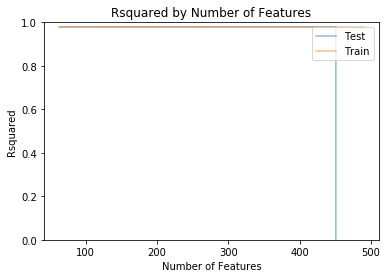

In [75]:
#Use the function to create X and y
X, y = clean_data(df_final,pred='occupancy_ratio') 
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [76]:
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2

0.9795901210964193
0.9780000521923164


In [77]:
coef_df = coef_weights(lm_model.coef_, X_train)
coef_df.head(20)

,est_int,coefs,abs_coefs
2,host_total_listings_count,1.681170e+08,1.681170e+08
1,host_listings_count,-1.681170e+08,1.681170e+08
36,calculated_host_listings_count_private_rooms,-7.895111e+07,7.895111e+07
35,calculated_host_listings_count_entire_homes,-7.895111e+07,7.895111e+07
34,calculated_host_listings_count,7.895111e+07,7.895111e+07
37,calculated_host_listings_count_shared_rooms,-7.895111e+07,7.895111e+07
53,neighbourhood_Long Beach,8.998446e-02,8.998446e-02
59,neighbourhood_cleansed_Long Beach,-8.269525e-02,8.269525e-02
91,calendar_last_scraped_2019-03-07,-2.355851e-02,2.355851e-02
57,neighbourhood_cleansed_Downtown,-1.670677e-02,1.670677e-02


### Occupancy ratio modeling impressions

-  The strongest predictors were related to host listings count. 
    - `host_total_listings_count` and `calculated_host_listings_count` had a positive impact on occupancy ratio.
    -  `host_listings_count`, `calculated_host_listings_count_private_rooms`, `calculated_host_listings_count_entire_homes` and `calculated_host_listings_count_shared_rooms` had a negative impact on occupancy ratio.


### Review scores rating

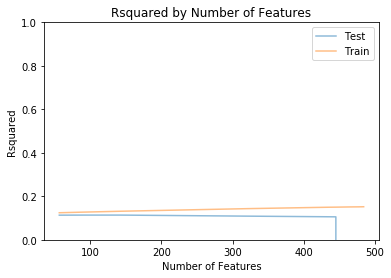

In [98]:
#Use the function to create X and y
X, y = clean_data(df_review_final,pred='review_scores_rating') 
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [99]:
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2

0.11364220142258497
0.13131303434129016


In [100]:
coef_df = coef_weights(lm_model.coef_, X_train)
coef_df.head(20)

,est_int,coefs,abs_coefs
87,city_Santa Monica,-2.912480e+12,2.912480e+12
107,"smart_location_Santa Monica, CA",2.912480e+12,2.912480e+12
88,city_West Hollywood,2.479594e+12,2.479594e+12
108,"smart_location_West Hollywood, CA",-2.479594e+12,2.479594e+12
1,host_listings_count,3.022781e+10,3.022781e+10
2,host_total_listings_count,-3.022781e+10,3.022781e+10
29,calculated_host_listings_count_private_rooms,-1.895036e+10,1.895036e+10
30,calculated_host_listings_count_shared_rooms,-1.895036e+10,1.895036e+10
28,calculated_host_listings_count_entire_homes,-1.895036e+10,1.895036e+10
27,calculated_host_listings_count,1.895036e+10,1.895036e+10


### Review scores rating modeling impressions

-  Due to how hevily skewed the `review_scores_rating` data is, the modeling was not able to accurately predict.
-  The strongest predictors of review scores are related to host listings count and location.

In [176]:
# See what `host_listings_count` looks like
df_final['host_listings_count'].describe()

count    33989.000000
mean         8.128571
std         36.336259
min          0.000000
25%          1.000000
50%          2.000000
75%          6.000000
max        852.000000
Name: host_listings_count, dtype: float64

# Summary

## Price

-  The price did not change based on season but had a small trend up.
-  The distribution of price is skewed right.
-  The mean is higher than the median suggesting there is larger variation on the higher end of price.  
-  The top 5 contributors to price were cleaning fee, bedrooms, accommodates, bathrooms, bathrooms, and beds.
-  The strongest predictor of price is location(`city`, `neighborhood`, and `smart location`).
    - Higher price by `city`:  [Malibu, Hawthorne, Santa Monica, Manhattan Beach, Torrance, Culver City, Venice, Alhambra]
    - Lower price by `city`:  [West Hollywood, Redondo Beach, Altadena, Burbank, Topanga, San Gabriel, Hacienda Heights, Monterey Park, Glandale, Temple City, Inglewood]
-  The number of host listings was also a significant predictor of price
    
    



## Occupancy Ratio

-  The distribution of the occupancy ratio is bimodal with the peaks closer to 0 and 1 while the average was 53%.  
-  The biggest contributing factor is booking for multiple days in a row.   
-  The next 5 contributors were host listings count, cleaning fee, price, number of reviews, and bathrooms.
-  The strongest predictors were related to host listings count. 
    - `host_total_listings_count` and `calculated_host_listings_count` had a positive impact on occupancy ratio.
    -  `host_listings_count`, `calculated_host_listings_count_private_rooms`, `calculated_host_listings_count_entire_homes` and `calculated_host_listings_count_shared_rooms` had a negative impact on occupancy ratio.




## Review Scores

-  The data is very heavily skewed left.  
-  The average score is 94.4.  
-  Due to how hevily skewed the `review_scores_rating` data is, the modeling and analysis were not able to accurately predict or determine contributing factors.
-  The strongest predictors of review scores are related to host listings count and location.